## Pill Defect Detector Image Processing
- Object Detection
- Alignment / Orientation Invariance
- Canny Edge Detection
- Contour Analysis

### Import Libraries

In [1]:

from flask import Flask, request, jsonify
from roboflow import Roboflow
import supervision as sv
import cv2
import os
import numpy as np
from werkzeug.utils import secure_filename
import base64
import threading
import requests
from PIL import Image

print("All packages installed successfully.")

All packages installed successfully.


### Python Flask Server to Receive Image

In [2]:
API_KEY = "ajyj4lk14bO6FTh12JI5"
PROJECT_NAME = "pills-detection-a1tzr"
VERSION = "1"

loading Roboflow workspace...
loading Roboflow project...
Model loaded successfully.


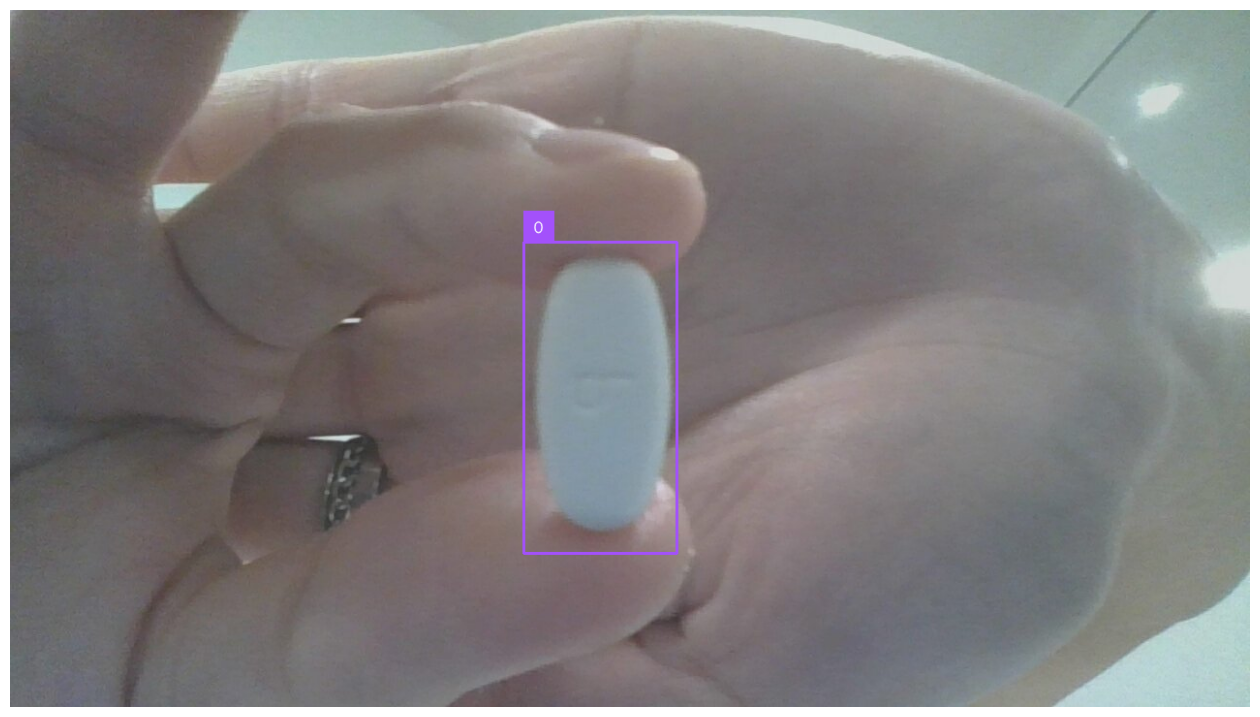

In [3]:
"""
Initialize Roboflow and load the specified model.
    
Parameters:
    api_key (str): Your Roboflow API key.
    project_name (str): Name of your Roboflow project.
    version (str): Version of the dataset/project.
    model_type (str): Type of model to load (default: 'yolov5').
"""
rf = Roboflow(api_key=API_KEY)
project = rf.workspace().project(PROJECT_NAME)
model = project.version(VERSION).model
print("Model loaded successfully.")

image_path = "./assets/pill_image.jpg"

result = model.predict(image_path, confidence=40, overlap=30).json()

labels = [item["class"] for item in result["predictions"]]

detections = sv.Detections.from_inference(result)

label_annotator = sv.LabelAnnotator()
bounding_box_annotator = sv.BoxAnnotator()

image = cv2.imread(image_path)

annotated_image = bounding_box_annotator.annotate(
    scene=image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections, labels=labels)

sv.plot_image(image=annotated_image, size=(16, 16))